In [ ]:
# 2022A 3)结果

In [36]:
"""
问题	入射波浪频率 (s-1)	垂荡附加质量 (kg)	纵摇附加转动惯量 (kg·m2)	垂荡兴波阻尼系数 (N·s/m)	纵摇兴波阻尼系数 (N·m·s)	垂荡激励力振幅 (N)	纵摇激励力矩振幅 (N·m)
问题1	1.4005	1335.535	6779.315	656.3616	151.4388	6250	1230
问题2	2.2143	1165.992	7131.29	    167.8395	2992.724	4890	2560
问题3	1.7152	1028.876	7001.914	683.4558	654.3383	3640	1690
问题4	1.9806	1091.099	7142.493	528.5018	1655.909	1760	2140
"""
pass

In [37]:
"""
参数	取值
浮子质量 (kg)	4866
浮子底半径 (m)	1
浮子圆柱部分高度 (m)	3
浮子圆锥部分高度 (m)	0.8
振子质量 (kg)	2433
振子半径 (m)	0.5
振子高度 (m)	0.5
海水的密度 (kg/m3)	1025
重力加速度 (m/s2)	9.8
弹簧刚度 (N/m)	80000
弹簧原长 (m)	0.5
扭转弹簧刚度 (N·m)	250000
静水恢复力矩系数 (N·m)	8890.7
"""
pass

In [38]:
import numpy as np

In [39]:
rho = 1025
g = 9.8
rho_g_pi_r2 = rho * g * np.pi * (1)**2

In [40]:
I_floater = 8289.43
I_floater_extra = 7131.29
I_oscillator = lambda x: 202.75 + 2443 * (0.75 + x)

m_oscillator = 2433
m_floater = 4866
m_floater_extra = 1028.876

k = 80000
g = 250000
wave_g = 8890.7
wave_fre = 1.7152
wave_force_max = 3640
wave_torque_max = 1690

gamma = 10000
gamma_wave = 683.4558

epsilon = 1000
epsilon_wave = 654.3383

In [41]:
time = 40 * 2 * np.pi / wave_fre
dt = 0.1
n_ = int(time / dt) + 1

In [42]:
ksi = np.zeros(n_)
x = np.zeros(n_)
theta = np.zeros(n_)
t = np.zeros(n_)

In [43]:
for t_ in range(2, n_):
    spring_force = -k * (x[t_ - 1] - ksi[t_ - 1])
    relative_speed = ((x[t_ - 1] - ksi[t_ - 1]) - (x[t_ - 2] - ksi[t_ - 2])) / dt
    damping_force = -gamma * np.sqrt(np.abs(relative_speed)) * relative_speed
    x[t_] = 2 * x[t_ - 1] - x[t_ - 2] + (spring_force + damping_force) * dt ** 2 / m_oscillator
    floating_force = -rho_g_pi_r2 * ksi[t_ - 1]
    wave_force = wave_force_max * np.cos(wave_fre * t_ * dt)
    secondary_wave_force = -gamma_wave * (ksi[t_ - 1] - ksi[t_ - 2]) / dt
    ksi[t_] = 2 * ksi[t_ - 1] - ksi[t_ - 2] + (secondary_wave_force + floating_force + wave_force - spring_force - damping_force) * dt ** 2 / (m_floater + m_floater_extra)
    
    ksi_acc = (ksi[t_] - 2 * ksi[t_ - 1] + ksi[t_ - 2]) / dt ** 2
    inertial_force = -m_floater_extra * ksi_acc
    inertial_torque = inertial_force * (x[t_] + 0.75 - 00.3) * np.sin(t[t_ - 1])
    
    spring_torque = -g * (t[t_ - 1] - theta[t_ - 1])
    relative_angular_speed = ((t[t_ - 1] - theta[t_ - 1]) - (t[t_ - 2] - theta[t_ - 2])) / dt
    damping_torque = -epsilon * relative_angular_speed
    t[t_] = 2 * t[t_ - 1] - t[t_ - 2] + (inertial_torque + spring_torque + damping_torque) * dt ** 2 / I_floater
    floating_torque = -wave_g * theta[t_ - 1]
    secondary_wave_torque = -epsilon_wave* (theta[t_ - 1] - theta[t_ - 2]) / dt
    wave_torque = wave_torque_max * np.cos(wave_fre * t_ * dt)
    theta[t_] = 2 * theta[t_ - 1] - theta[t_ - 2] + (secondary_wave_torque + floating_torque + wave_torque- spring_torque - damping_torque) * dt ** 2 / (I_floater + I_floater_extra)

In [44]:
import matplotlib.pyplot as plt

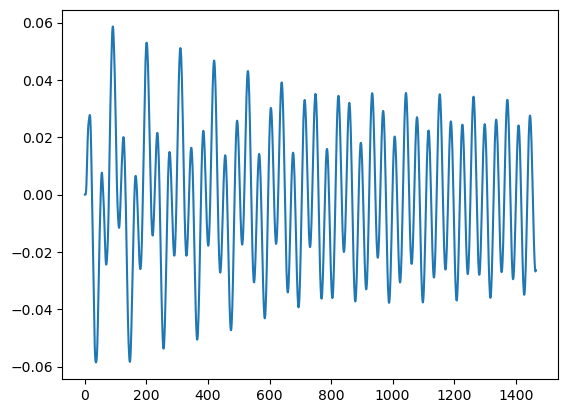

In [45]:
plt.plot(t)

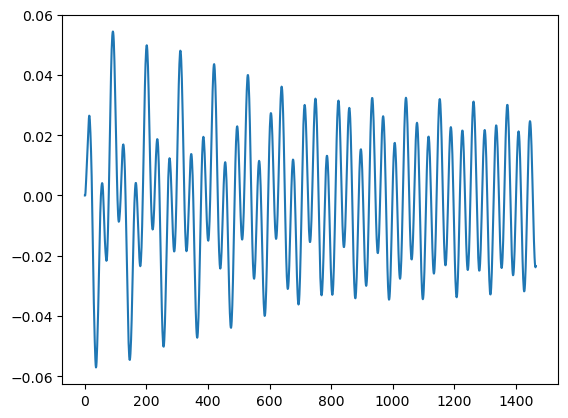

In [47]:
plt.plot(theta)